In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

import csv
from collections import Counter

In [2]:
def distribution(records, question):
    "Get distribution of answers, for a given question."
    c = Counter(record[question] for record in records)
    total = sum(c.values())
    empty = c['']
    counts = {key: {"number": value, 
                    "percentage": (value/total) * 100, 
                    "percentage_answered": (value/(total-empty)) * 100} 
                for key, value in c.items()}
    try:
        del counts['']['percentage_answered']
    except:
        pass
    return counts


def get_questions(question, number):
    "Get questions for a range of questions in a grid."
    texts = []
    for i in range(1,number+1):
        item = f'Q{question}_{i}'
        text = questions[item]
        text = text.split('-')[-1].strip()
        texts.append(text)
    return texts


def get_texts(records, question):
    "Get answer texts."
    return [answer for record in records 
                   if not (answer := record[question]) == ''] # Look at that cool walrus operator!


def basic_stats(records, question):
    "Print basic statistics about the results."
    counts = distribution(records, question)
    for key, results in counts.items():
        if not key == '':
            print(f"{key}: {results['number']} ({results['percentage_answered']:.2f}%)")

    
def underscored(base, number, records):
    "Get answer distribution for all subquestions."
    results = dict()
    for i in range(1, number+1):
        question = f"Q{base}_{i}"
        results[question] = distribution(records, question)
    return results


def agreement(counts):
    "Select percentage answered for all answers except the empty string."
    results = dict()
    for answer in ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']:
        try:
            results[answer] = counts[answer]['percentage_answered']
        except:
            results[answer] = 0
    return results


def write_texts(texts, filename):
    "Write texts from a list to a file."
    with open('./texts/' + filename,'w') as f:
        writer = csv.writer(f)
        writer.writerow(['identifier', 'comment'])
        writer.writerows([[i, row] for i, row in enumerate(texts,start=1)])

In [3]:
df = pd.read_excel("internal_survey_results.xlsx")
df = df.fillna('')
records = df.to_dict("records")

In [4]:
consented = [record for record in records if str(record['Q1 ']).startswith("Yes")]

# For subgroup analysis:
academia = [record for record in records if str(record['Q2'])=='Academia']
industry = [record for record in records if str(record['Q2'])=='Industry']

In [5]:
# If necessary, here are all questions:
questions = records[0]

In [6]:
"""
TODO:
- Subgroup analysis: academia vs industry
- Heatmap tables
"""

'\nTODO:\n- Subgroup analysis: academia vs industry\n- Heatmap tables\n'

# Demographics

In [7]:
# Where do people come from?
basic_stats(consented, "Q2")

Academia: 10 (76.92%)
Other: 1 (7.69%)
Industry: 2 (15.38%)


In [8]:
# Time spent working in NLG:
basic_stats(consented, "Q3")

2-5 years: 7 (53.85%)
11 or more years: 2 (15.38%)
Less than 2 years: 1 (7.69%)
6-10 years: 3 (23.08%)


In [9]:
# Read an error analysis:
basic_stats(consented, "Q4")

Yes: 12 (92.31%)
No: 1 (7.69%)


In [10]:
# Carried out an error analysis:
basic_stats(consented, 'Q9')

Yes: 8 (66.67%)
No: 4 (33.33%)


In [11]:
# Considered carrying one out (only people who answered 'no'):
basic_stats(consented, 'Q12')

Once or twice: 3 (75.00%)
I'm planning to carry out an error analysis in the future: 1 (25.00%)


In [12]:
# Willing to carry one out (only people who answered 'no'):
basic_stats(consented, 'Q14')

Definitely yes: 3 (75.00%)
Probably yes: 1 (25.00%)


# Usefulness of error analyses

In [13]:
# Found useful:
basic_stats(consented, 'Q5')

Extremely useful: 2 (16.67%)
Moderately useful: 2 (16.67%)
Slightly useful: 1 (8.33%)
Very useful: 6 (50.00%)
Not at all useful: 1 (8.33%)


In [14]:
# Uses:
texts = get_texts(consented, 'Q6')
write_texts(texts, "uses_of_error_analysis.csv")

for text in get_texts(consented, 'Q6'):
    print(text)
    print('----')

Error analyses better explain the capabilities of the systems, which is not always the case with automatic metrics for evaluation as well as human ratings. 
----
It provided me with a better understanding of the type and frequency of errors.  This is much more useful to me in terms of understanding the problem, than a single number metric within a task.
----
The error analyses provided additional insight into the performance of the NLG systems. Usually, the error analyses would include more details on the accuracy or fidelity of the text generation system. 
----
much better understanding of the kind of errors the systems make
----
It gives much better insight into the system behavior than overall statistics from the automatic metrics or human evaluation.
----
Acknowledging patterns of model shortcomings was very helpful in making the differences (strengths and weaknesses) between different models more concrete than simply discussing small differences in automatic metrics.
----
Allows f

In [15]:
texts

['Error analyses better explain the capabilities of the systems, which is not always the case with automatic metrics for evaluation as well as human ratings. ',
 'It provided me with a better understanding of the type and frequency of errors.  This is much more useful to me in terms of understanding the problem, than a single number metric within a task.',
 'The error analyses provided additional insight into the performance of the NLG systems. Usually, the error analyses would include more details on the accuracy or fidelity of the text generation system. ',
 'much better understanding of the kind of errors the systems make',
 'It gives much better insight into the system behavior than overall statistics from the automatic metrics or human evaluation.',
 'Acknowledging patterns of model shortcomings was very helpful in making the differences (strengths and weaknesses) between different models more concrete than simply discussing small differences in automatic metrics.',
 "Allows for a

In [16]:
# Reasons for disappointment:
texts = get_texts(consented, 'Q7')
write_texts(texts, "reasons_for_disappointment.csv")

for text in texts:
    print(text)
    print('----')

It was impossible to find what steps we should follow to do a correct or complete error analysis or how we define it.
----


# Barriers and enabling factors

In [17]:
# Challenges:
texts = get_texts(consented, 'Q10')
write_texts(texts, "challenges.csv")

for text in texts:
    print(text)
    print('----')

I did not find carrying it out particularly challenging as the type of evaluation was "evaluation by annotation".  Annotators had already found and categorised the errors, I was only looking for patterns within that, so, for example, within "Number" errors, looking at which we ordinal or cardinal, etc.
----
I found the following challenging when using human evaluation for error analysis:
- Selecting an appropriate error taxonomy for the evaluation. There is no standardised definitions for the error types, and it was hard to know the appropriate level of technical language acceptable for the annotators.
- Achieving a high inter-annotator agreement on a survey.
----
- establishing the taxonomy of errors
- selecting examples for the analysis
- finding the time for analyzing enough samples (usually operating given a paper deadline)
- handling edge cases (e.g. in fluency errors) or ambiguous cases (error may be of two differnt types)
----
It was very hard to define or categorise different t

In [18]:
# Enough resources/reference materials at the time?
basic_stats(consented,'Q11')

No: 7 (87.50%)
Yes: 1 (12.50%)


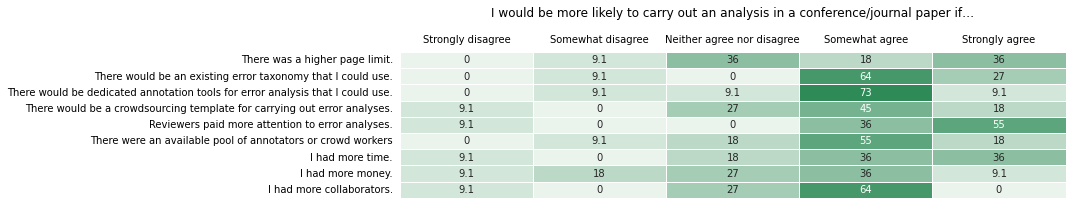

In [19]:
answers = ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']
records = []
for question, counts in underscored(16,9,consented).items():
    for answer in answers:
        percentage = 0
        if answer in counts:
            percentage = counts[answer]['percentage_answered']
        record = dict(question=question, answer=answer, percentage=percentage)
        records.append(record)

df = pd.DataFrame(records)
# Pivot to make a square table:
df = df.pivot(index='question', columns='answer', values='percentage')
# Reorder columns:
df = df[['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']]

plt.rcParams["figure.figsize"] = (15,3)
ax = sns.heatmap(df,cmap=sns.light_palette("seagreen", as_cmap=True),linewidth=1,cbar=False,annot=True)
ax.xaxis.tick_top()
plt.xticks(np.arange(5) + 0.5, labels=answers)
plt.yticks(np.arange(9) + 0.5, labels=get_questions(16,9))
plt.tick_params(top=False,left=False)
plt.xlabel('')
plt.ylabel('')
plt.title("I would be more likely to carry out an analysis in a conference/journal paper if…", y=1.2)
plt.tight_layout()
plt.savefig("Q16.pdf")

In [20]:
# Enough resources/reference materials currently?
basic_stats(consented,'Q20')

No, I am still missing:: 10 (90.91%)
Yes: 1 (9.09%)


In [21]:
# What is still missing?
texts = get_texts(consented, 'Q20_2_TEXT')
write_texts(texts, "missing.csv")

for text in texts:
    print(text)
    print('----')

An error taxonomy! 
----
Much like evaluation, there are guidelines, but researchers (particularly at the PGR or small group level) are often left to try and just find something that works for them.  This is in part also because there is no one way to do an error analysis, and the problem/domain can have an effect on what you should do as well.
----
Standardised error definitions and guidelines for conducting error analysis with them.
----
I'd say "almost" -- since not much is needed. Some easy-to-use annotation tools would be helpful, but not crucial -- simple ad-hoc scripts and spreadsheets work well enough for me in most cases
----
a taxonomy agreed upon by the community which would make the results comparable across papers
----
Either templates and a thorough how-to guide, or a repository of existing error analyses to use as examples.
----
Available domain experts in the minority languages I deal with
----
A taxonomy of common errors.
----
Standardisation and the expectation from o

In [22]:
# Other factors that make it more likely for you to carry out an error analysis?
texts = get_texts(consented, 'Q21')
write_texts(texts, "enabling.csv")

for text in get_texts(consented, 'Q21'):
    print(text)
    print('----')

If it is a standard approach in our field, then people will do it. 
----
The main factors are reviewers not considering them a contribution, and paper page limit.  All the resources in the world will make no difference whilst this is the case.  As an author of our error analysis I tried to include one in a journal submission (10 page ACL format) but had to cut it for space.  We include 2 pages of math that is basically the same as every other 2 pages of math, so we can pretend we are generalizing, but no error analysis.
----
I would be more likely to carry out an error analysis if I see it as part of the requirements to journals / conferences, and if I see more accepted papers including error analysis.
----
I'd say the main thing missing is push/incentives to move the field to do them on a larger scale.
----
Providing an effective training for the NLG community,  by conducting workshops, tutorials, and demos.
----
If error analyses are incentivized/prioritized from a publishing/reviewe

# General opinions

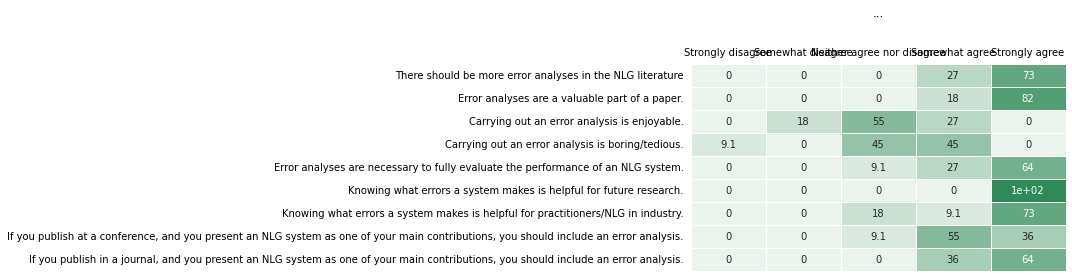

In [23]:
answers = ['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']
records = []
for question, counts in underscored(18,9,consented).items():
    for answer in answers:
        percentage = 0
        if answer in counts:
            percentage = counts[answer]['percentage_answered']
        record = dict(question=question, answer=answer, percentage=percentage)
        records.append(record)

df = pd.DataFrame(records)
# Pivot to make a square table:
df = df.pivot(index='question', columns='answer', values='percentage')
# Reorder columns:
df = df[['Strongly disagree', 'Somewhat disagree', 'Neither agree nor disagree', 'Somewhat agree', 'Strongly agree']]

plt.rcParams["figure.figsize"] = (15,4)
ax = sns.heatmap(df,cmap=sns.light_palette("seagreen", as_cmap=True),linewidth=1,cbar=False,annot=True)
ax.xaxis.tick_top()
plt.xticks(np.arange(5) + 0.5, labels=answers)
plt.yticks(np.arange(9) + 0.5, labels=get_questions(18,9))
plt.tick_params(top=False,left=False)
plt.xlabel('')
plt.ylabel('')
plt.title("...", y=1.2)
plt.tight_layout()
plt.savefig("Q18.pdf")

In [24]:
# More/less/equally likely to include error analysis in journal
basic_stats(consented, 'Q19')

Equally: 2 (18.18%)
More: 9 (81.82%)


# Requirements for reports of error analyses

In [25]:
texts = get_texts(consented, 'Q23')
write_texts(texts, "reporting_requirements.csv")

for text in texts:
    print(text)
    print('----')

Details about who the annotators are (researchers, professionals, crowd workers) and what if any qualification work they had to indicate they were capable of doing the error annotation.
----
Samples of the system output with errors, and analysis of the cause for the error.
----
- examples for the different error types described
- details on the methodology (chosen system variants and samples, motivation for the chosen error taxonomy)
----
several representative outputs of the system (not cherry-picking the best ones, but not random either - rather highlighting the advantages & problems of the system)
----
Example outputs showing errors/the context in which errors tend to occur.
----
Relevant background of the annotators, e.g. whether journalists or crowd workers analyzed news text.
----
Definitions for each type of error, and an appendix with annotation guidelines.

If carrying out a comparison between two systems, I would appreciate some statistics to see if an error occurs significan

# General comments

In [26]:
texts = get_texts(consented, 'Q24')
write_texts(texts, "general_comments.csv")

for text in texts:
    print(text)
    print('----')

With the question:  ~"Would I be more likely to do an error analysis for a journal", we could maybe have an additional comments field so people can ask why?
----
AUTHOR
----
